<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Exercise on the least squares method

You're given a CPT data set consisting of cone resistance $q_\text{c}$ and frictional resistance $f_\text{s}$ measurements. Your first task is to check the results by plotting them and to compute as well as plot the friction ratio $R_\text{f}$.

In [210]:
import numpy as np #numerical methods
#import sympy as sp #symbolic operations
import matplotlib.pyplot as plt #plotting
import pandas as pd

#Some plot settings
%run plot_functions/plot_settings.py

In [211]:
%run plot_functions/plot_settings.py
%run plot_functions/CPT_plots.ipynb

In [212]:
CPT_data = pd.read_csv('Data/CPT_2015.csv')

In [213]:
CPT_data

,Teufe,qc,fs
0,[m],[MN/m²],[MN/m²]
1,0.0000000000,0.0000000000,0.0000000000
2,0.0200000000,0.0000000000,0.0000000000
3,0.0400000000,0.0672000000,0.0000000000
4,0.0600000000,0.1176000000,0.0002000000
...,...,...,...
1287,25.7200000000,4.8557000000,0.0518000000
1288,25.7400000000,4.8280000000,0.0497000000
1289,25.7600000000,4.8296000000,0.0497000000
1290,25.7800000000,4.8479000000,0.0497000000


In [214]:
z = CPT_data.Teufe[1:].to_numpy(dtype=float)
qc = CPT_data.qc[1:].to_numpy(dtype=float)
fs = CPT_data.fs[1:].to_numpy(dtype=float)
with np.errstate(divide='ignore',invalid='ignore'):
    Rf = np.divide(fs,qc)

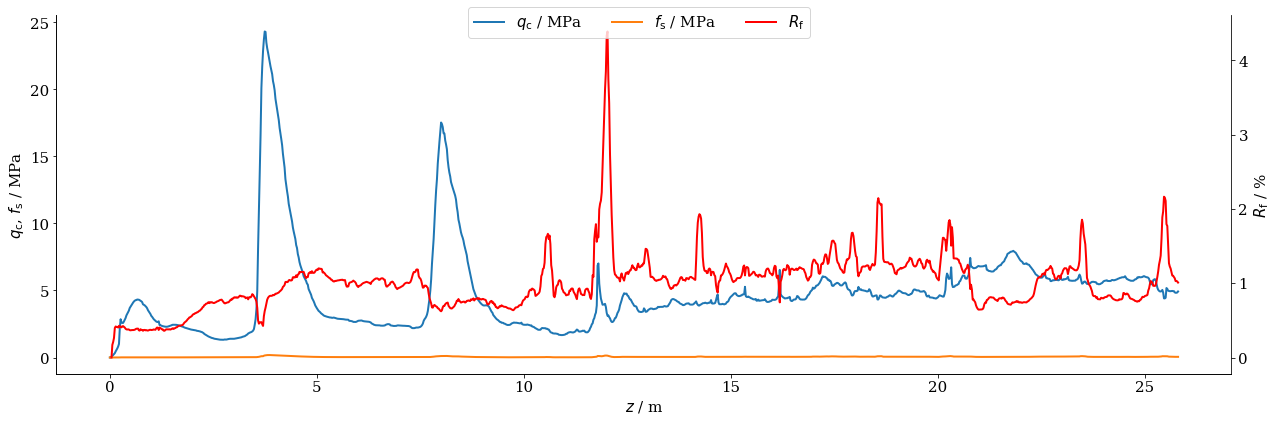

In [215]:
plot_CPT_raw(z,qc,fs,Rf)

You're also given data on the relationship between $q_\text{c}$ and $I_\text{D}$. The data is valid only for $z > 2$ m as well as above the phreatic surface. Your task is now to find a functional relationship $I_\text{D}(q_\text{c})$ in order to estimate the $I_\text{D}$ distribution in the above soil profile investigated with cone prenetration testing.

In [216]:
ID_data = pd.read_csv('Data/qc_ID.csv')

In [217]:
ID_data

,Unnamed: 0,qc,ID
0,0,5.0,0.129347
1,1,5.0,0.377361
2,2,5.1,0.203143
3,3,5.3,0.402178
4,4,5.9,0.047880
...,...,...,...
66,66,30.5,0.621235
67,67,30.7,0.596967
68,68,31.5,0.694110
69,69,31.9,0.614531


In [218]:
#sorted for later convenience
qc_ID = ID_data[1:].astype(dtype=float).sort_values(by=['qc']).qc[:].to_numpy(dtype=float)
ID = ID_data[1:].astype(dtype=float).sort_values(by=['qc']).ID[:].to_numpy(dtype=float)

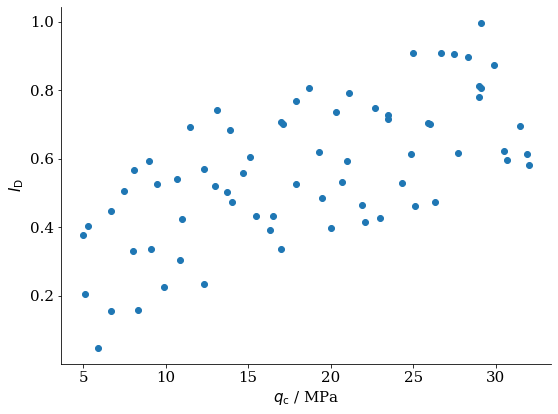

In [219]:
plot_ID_raw(qc_ID, ID)

The profile appears to be a logarithmic function (you may also employ a polynomial formulation), i.e. we choose an Ansatz

$$
    I_\text{D}^\text{mod} = a + b \log q_\text{c}
$$

The first task at hand is now to identify the free parameters $a$ and $b$.

For that purpose, we would like to minimize the overall deviation between the model $I_\text{D}^\text{mod}(q_\text{c})$ and the experimental data $(I_\text{D},\, q_\text{c})$.

To measure this deviation, we introduce the error or residual 

$$
    r = I_\text{D}^\text{mod} - I_\text{D}
$$

and seek the minimum of the squared error functional. In other words, we use the least squares approach:

\begin{align}
    a, b &= \text{arg}\,\text{min} \int \limits_{q_\text{c}^\text{min}}^{q_\text{c}^\text{max}} \frac{1}{2} r(q)^2\,\text{d} q
    \\
    &= \text{arg}\,\text{min} \sum \limits_{i=1}^{n_\text{exp}} \frac{(I_\text{D}^\text{mod} - I_\text{D})_i^2}{2}
\end{align}

We have two unknowns and require two equations. The necessary conditions for finding the minimum are given by:

\begin{align}
    0 &= \frac{\partial}{\partial a} \sum \limits_{i=1}^{n_\text{exp}} \frac{(I_\text{D}^\text{mod} - I_\text{D})_i^2}{2}
    \\
    0 &= \frac{\partial}{\partial b} \sum \limits_{i=1}^{n_\text{exp}} \frac{(I_\text{D}^\text{mod} - I_\text{D})_i^2}{2}
\end{align}

This can be reformulated as

\begin{align}
    0 &= \sum \limits_{i=1}^{n_\text{exp}} \left. \frac{\partial I_\text{D}^\text{mod}}{\partial a} \right|_i (I_\text{D}^\text{mod} - I_\text{D})_i
    \\
    0 &= \sum \limits_{i=1}^{n_\text{exp}} \left. \frac{\partial I_\text{D}^\text{mod}}{\partial b} \right|_i (I_\text{D}^\text{mod} - I_\text{D})_i
\end{align}

The necessary partial derivatives are given by

\begin{align}
    \frac{\partial I_\text{D}^\text{mod}}{\partial a} &= 1
    \\
    \frac{\partial I_\text{D}^\text{mod}}{\partial b} &= \log q_\text{c}
\end{align}

Thus, we arrive at the following set of equations to solve for $a$ and $b$:

\begin{align}
    0 &= \sum \limits_{i=1}^{n_\text{exp}} (a + b \log q_\text{c} - I_\text{D})_i
    \\
    0 &= \sum \limits_{i=1}^{n_\text{exp}} \log q_{\text{c},i} (a + b \log q_\text{c} - I_\text{D})_i
\end{align}

This results in the linear equation system $A x = \text{RHS}$:

\begin{align}
\begin{pmatrix}
n_\text{exp} & \sum \limits_{i=1}^{n_\text{exp}} \log q_{\text{c},i}
\\
\sum \limits_{i=1}^{n_\text{exp}} \log q_{\text{c},i} & \sum \limits_{i=1}^{n_\text{exp}} (\log q_{\text{c},i})^2
\end{pmatrix}
\begin{pmatrix}
a
\\
b
\end{pmatrix}
=
\begin{pmatrix}
\sum \limits_{i=1}^{n_\text{exp}} (I_\text{D})_i
\\
\sum \limits_{i=1}^{n_\text{exp}} (\log q_\text{c} I_\text{D})_i
\end{pmatrix}
\end{align}

Let's construct this system of equations and solve it:

In [220]:
RHS = np.array([ID.sum(),(np.log(qc_ID)*ID).sum()])
RHS

array([ 39.57177534, 115.62077595])

In [221]:
A = np.array([[len(ID),np.log(qc_ID).sum()],[np.log(qc_ID).sum(),(np.log(qc_ID)*np.log(qc_ID)).sum()]])
A

array([[ 70.        , 196.12434264],
       [196.12434264, 567.7339735 ]])

In [222]:
x = np.linalg.solve(A,RHS)
x

array([-0.16434598,  0.26042659])

As we see, $a\approx -0.164$ and $b \approx 0.260$. We put this into the model and then check whether it matches the data. For that purpose, we can now also compare model and data by plotting one over the other and compare them to an ideal line.

In [223]:
ID_mod = lambda qc: x[0] + x[1] * np.log(qc)

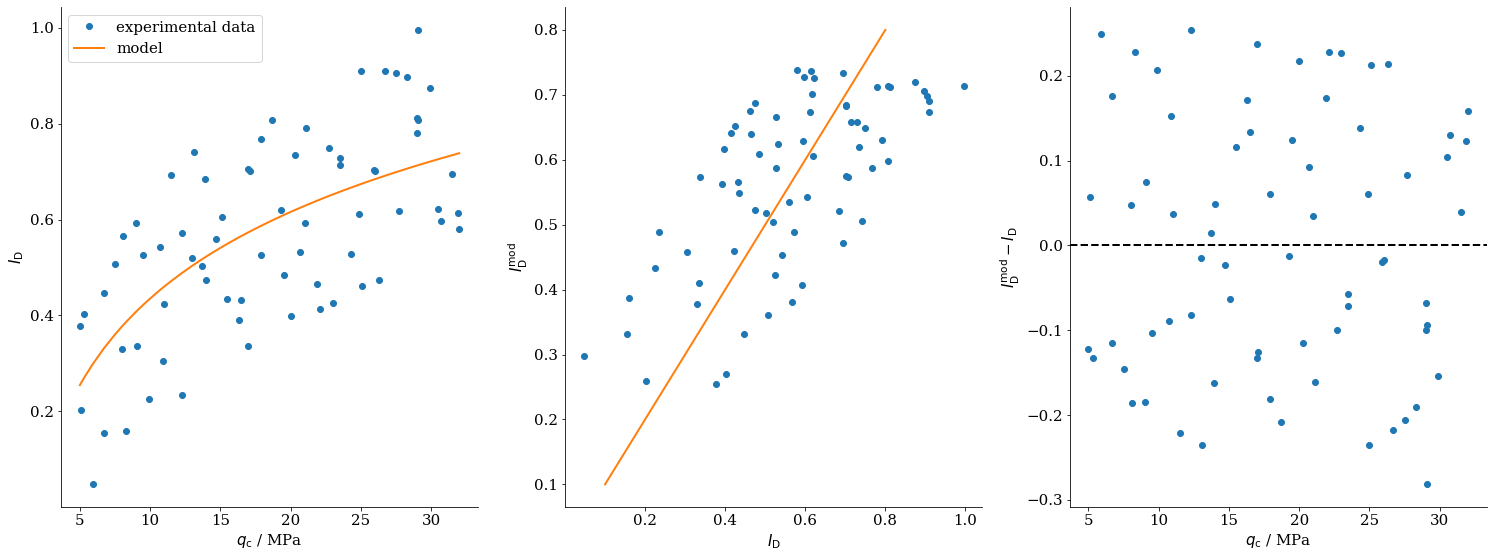

In [224]:
plot_ID_model(qc_ID, ID)

The visual inspection looks good. At the end of the notebook, we calculate some quality measures for the fit.

Now that we've established a model for the relationship between $I_\text{D}$ and $q_\text{c}$ as well as quantified it's reliability, we can come back to the task at hand and calculate the $I_\text{D}$ profile from the CPT data.

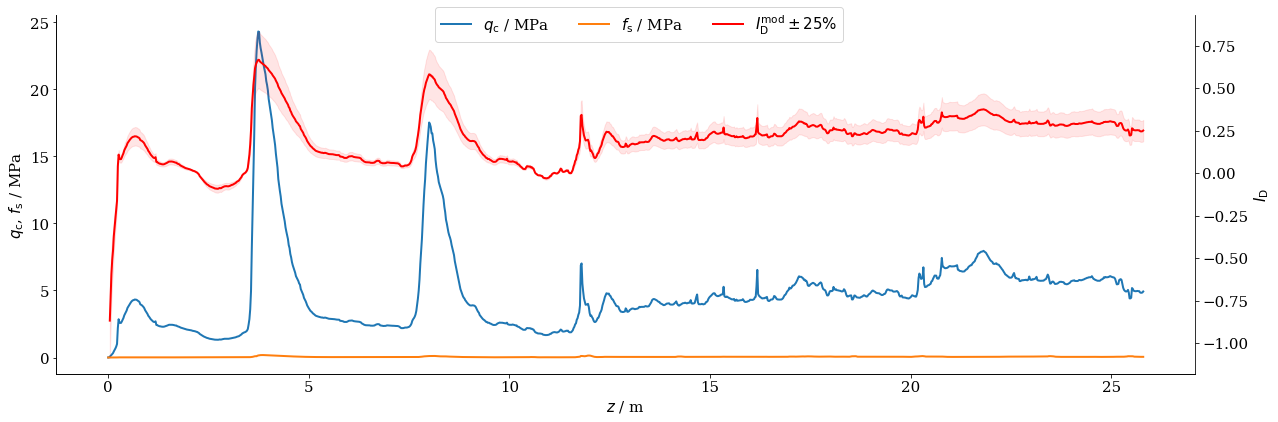

In [225]:
with np.errstate(divide='ignore',invalid='ignore'):
    plot_prediction(z,qc,fs,np.where(z>0.))

We observe a wide range of negative data. This is because the model was applied outside of the parameter range for which it is applicable. The model is calibrated only for $5\,\text{MPa} \leq q_\text{c} \leq 30\,\text{MPa}$ and is valid only in depths below $2\,\text{m}$. We therefore restrict its application to this range:

In [241]:
admissible_depths = np.where(z > 2.)
admissible_qcs = np.where(qc > 5.)

admissible_data_points = np.intersect1d(admissible_depths,admissible_qcs)

Now we can plot only those data points that are within the admissible model range:

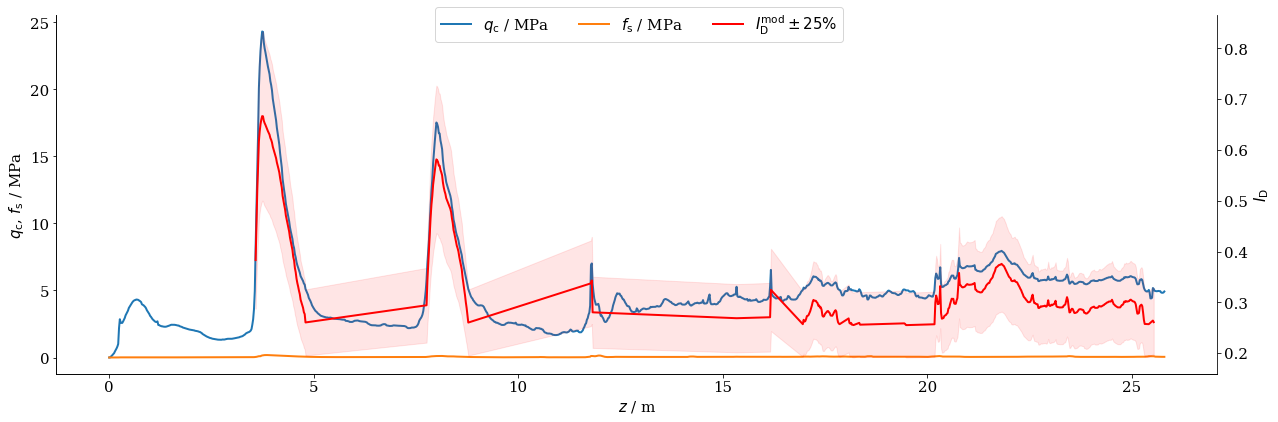

In [242]:
plot_prediction(z,qc,fs,admissible_data_points)

## Remarks

The idea of this exercise was to demonstrate a possible use case for and the workflow for a least squares analysis. The application of the $I_\text{D}$ correlation to explain the $q_\text{c}$ data is of course greatly simplified. There are other potential causes of an increase in $q_\text{c}$ that are not explained by this model.

Also, the $\pm 25$% band in the above graph is not very informative. A better alternative will be explained in the sequel.

## How good is the model?

This question is much broader than what follows and requires a lot of engineering judgement. It's not answered straight as straight forwardly as the numbers below make it appear.

Let's take a glimps into statistics anyways. To look at variability in the data and signal-to-noise ratio, we calculate the mean of the experimental data as a reference point.

$$
    \bar{I}_\text{D} = \frac{1}{n_\text{exp}} \sum \limits_{i=1}^{n_\text{exp}} I_{\text{D},i}
$$

The quantity $I_{\text{D},i} - \bar{I}_\text{D}$ measures the deviation of a data point to the mean of the data. We can split this up into two parts: the distance of the data point to the regression (the best guess using the model), i.e. the error between data and model, and the distance of the regression to the mean of the data:

$$
    I_{\text{D},i} - \bar{I}_\text{D} = \left( I_{\text{D},i} - I_{\text{D},i}^\text{mod}  \right) + \left( I_{\text{D},i}^\text{mod} - \bar{I}_\text{D}  \right)
$$

To get an unsigned measure of deviation we square both sides

$$
    \left( I_{\text{D},i} - \bar{I}_\text{D} \right)^2 = \left( I_{\text{D},i} - I_{\text{D},i}^\text{mod}  \right)^2 + 2\left( I_{\text{D},i} - I_{\text{D},i}^\text{mod}  \right)\left( I_{\text{D},i}^\text{mod} - \bar{I}_\text{D}  \right) + \left( I_{\text{D},i}^\text{mod} - \bar{I}_\text{D}  \right)^2
$$

Now, if we sum up over all data points, in general, the middle term on the RHS vanishes only for linear models. In other words, in the case of linear models we arrive at

$$
    \underbrace{\sum \limits_i \left( I_{\text{D},i} - \bar{I}_\text{D} \right)^2}_{\text{TSS}} \overset{\text{linearity}}{=} \underbrace{\sum \limits_i \left( I_{\text{D},i} - I_{\text{D},i}^\text{mod}  \right)^2}_{\text{RSS}} + \underbrace{\sum \limits_i  \left( I_{\text{D},i}^\text{mod} - \bar{I}_\text{D}  \right)^2}_{\text{RegSS}}
$$

We recognize the term on the LHS being similar to the variance of the data. We call this the total sum of squares (TSS). On the RHS, we recognize the last term as a measure for the part of the variability in 
the data which can be explained and call this the regression sum of squares (RegSS). The first term on the LHS gives us that part of the variability which cannot be explained (difference from data to model). We call this the residual sum of squares (RSS). Let's plot the individual contributions to these variance measures:

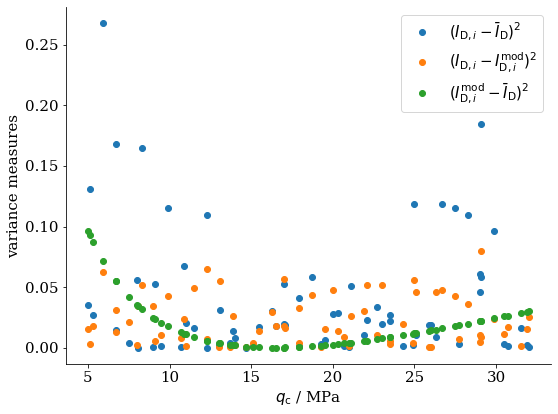

In [228]:
#%run plot_functions/CPT_plots.ipynb
plot_basic_stats(qc_ID, ID)

Even where the data are far from the mean, the model is relatively close to the data and thus represents its overall trend or, in other words, the model represents some variability of the data as the signal while the remainder is error (or noise).

The $R^2$ value is defined as 

$$
    R^2 = \frac{\text{RegSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

Should the experimental variance be completely captured by the model, $R^2=1$. If the model simply predicts the mean (so-called baseline model), and the total variance is left to noise, we arrive at $R^2 = 0$. The more the model explains part of the variability of the data, the more $R^2$ approaches 1. If the model predictions are worse than the baseline model, $R^2$ is negative.

In [229]:
R_squared = 1. - np.sum((ID - ID_mod(qc_ID))**2) / np.sum((ID - ID.mean())**2)
print("The model has a coefficient of determination of R² = %.4f." %R_squared)

The model has a coefficient of determination of R² = 0.4389.


However, $R^2$ is **only meaningful for linear regressions**. The model used here is linear in the coefficients $a$ and $b$.

### Standard error of the regression SER

Another measure is known as the RSME, the Root Mean Squared Error. Unlike the coefficient of determination $R^2$, which quantifies the explanatory content RegSS of the model, the SER gives an estimate of the standard deviation of the unobservable effects affecting the target variable, i.e. an estimate of the standard deviation of the unobservable effects after the effects of the explanatory variables have been accounted for.

A statistical estimate of the total variance in the data could be calculated by

$$
    S^2 = \frac{1}{n-1} \sum \limits_i \left(I_{\text{D},i} - \bar{I}_\text{D} \right)^2
$$

and is related to the TSS value from before. A similar value can be calculated that has similarity to our noise-related RSS:

$$
    S_\epsilon^2 = \frac{1}{n-1} \sum \limits_i \left( I_{\text{D},i} - I_{\text{D},i}^\text{mod}  \right)^2
$$

We can then calculate

$$
    \text{RMSE} = \sqrt{\frac{\sum \limits_i \left( I_{\text{D},i} - I_{\text{D},i}^\text{mod}  \right)^2}{n-1}}
$$

In [230]:
RMSE = np.sqrt(np.sum((ID - ID_mod(qc_ID))**2)/(len(ID)-1))
print("The model has a SER/RMSE value of %.4f." %RMSE)

The model has a SER/RMSE value of 0.1514.


This has units of the modelled quantity and can be probabilistically interpreted (i.e. given a normal distributions, which portion of the errors lies in a certain $\sigma$ interval). The quantity is, however, sensitive to outliers. Other measures have been proposed, each with certain advantages and disadvantages (see https://www.statworx.com/content-hub/blog/was-dem-mape-falschlicherweise-vorgeworfen-wird-seine-wahren-schwachen-und-bessere-alternativen/#:~:text=Der%20RMSE%20hingegen%20ist%20nicht,(Mean%20Absolute%20Percentage%20Error).)

In [231]:
SDNMA = (np.sum(np.abs(ID-ID_mod(qc_ID)))/len(ID))/np.std(ID)

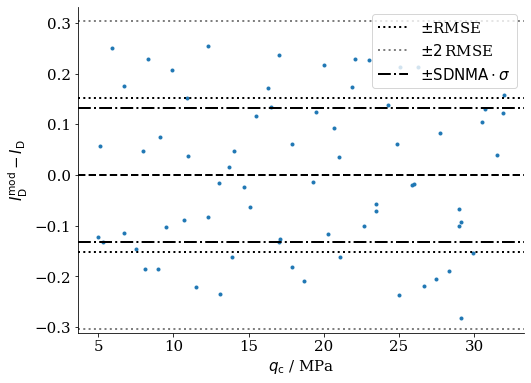

In [232]:
plt.plot(qc_ID,(ID_mod(qc_ID)-ID),ls='',marker='.')
plt.axhline(0,ls='--')
plt.axhline(RMSE,ls=':',label=r'$\pm$RMSE')
plt.axhline(-RMSE,ls=':')
plt.axhline(2*RMSE,ls=':',label=r'$\pm 2\,$RMSE',alpha=0.5)
plt.axhline(-2*RMSE,ls=':',alpha=0.5)
plt.axhline(SDNMA*np.std(ID),ls='-.',label=r'$\pm \mathrm{SDNMA} \cdot \sigma$')
plt.axhline(-SDNMA*np.std(ID),ls='-.')
plt.xlabel(r'$q_\mathrm{c}$ / MPa')
plt.ylabel(r'$I_\mathrm{D}^\mathrm{mod} - I_\mathrm{D}$')
plt.legend();

## Confidence and prediction bands

To make our lifes easier, we use a stats package and re-do our least-squares fit.

In [233]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

In [234]:
X = sm.add_constant(np.log(qc_ID))
re = sm.OLS(ID, X).fit()
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     53.18
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           4.21e-10
Time:                        21:19:54   Log-Likelihood:                 33.327
No. Observations:                  70   AIC:                            -62.65
Df Residuals:                      68   BIC:                            -58.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1643      0.102     -1.616      0.1

We obtain the same coefficients as in our "hand calculation".

In [243]:
st, data, ss2 = summary_table(re, alpha=0.05)
#st

In [236]:
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T #confidence intervals
predict_ci_low, predict_ci_upp = data[:, 6:8].T #prediction intervals

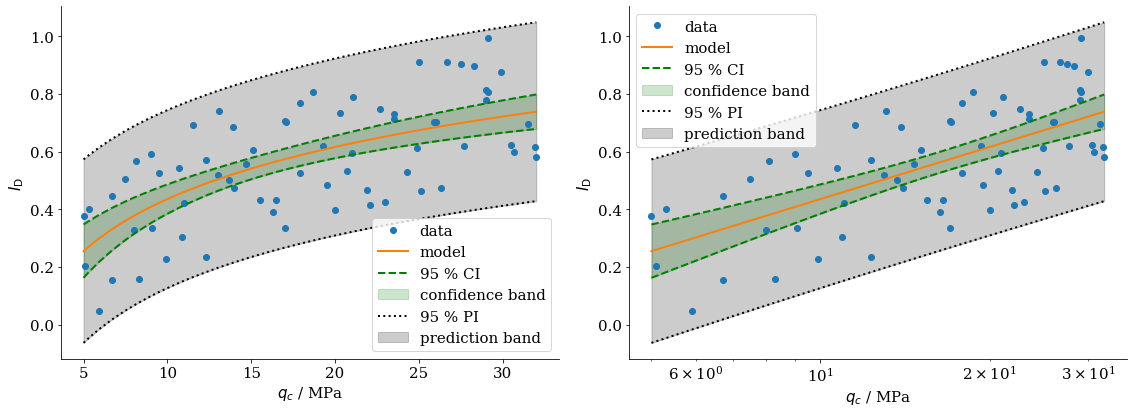

In [244]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
for i in range(2):
    ax[i].plot(qc_ID,ID,ls='',marker='o', label=r'data')
    ax[i].plot(qc_ID,data[:,2], label=r'model')
    ax[i].plot(qc_ID,data[:,4], color='green',ls='--',label=r'95 % CI')
    ax[i].plot(qc_ID,data[:,5], color='green',ls='--')
    ax[i].fill_between(qc_ID,data[:,4],data[:,5],color='green',alpha=0.2,label=r'confidence band')
    ax[i].plot(qc_ID,data[:,6], color='black',ls=':',label=r'95 % PI')
    ax[i].plot(qc_ID,data[:,7], color='black',ls=':')
    ax[i].fill_between(qc_ID,data[:,6],data[:,7],color='black',alpha=0.2,label=r'prediction band')
    ax[i].set_xlabel(r'$q_c$ / MPa')
    ax[i].set_ylabel(r'$I_\mathrm{D}$')
    ax[i].legend()
ax[1].set_xscale('log')
fig.tight_layout();
#fig.savefig('confidence_bands.pdf')

The 95% confidence interval tells us that we can be 95% confident that the *mean* $I_\text{D}$ value for a given $q_c$ lies within the confidence bands. Predictions of a single $I_\text{D}$ value is much less certain and is described by the prediction interval: We can be 95% certain that a single soil sample will lie in this range.

We observe that both bands are narrowest around the mean and that confidence decreases towards the margins of the data set. This becomes particularly clear in the log plot which also visualizes that this is in fact a linear regression.

Nice explanations of confidence and predction bands as well as the equations behind them can be found here:

https://www.youtube.com/watch?v=qVCQi0KPR0s

http://www2.stat.duke.edu/~tjl13/s101/slides/unit6lec3H.pdf

## Tasks:

* Observe how the width of the confidence and prediction bands changes as you give more or less data to the problem.